In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
nonPriv = pd.read_csv('Attack_OriginalData.csv')
nonPriv.head()

,Run,K,Threshold,Precision,Recall,Accuracy
0,0,5,0,0.833333,1.0,0.9
1,0,5,1,0.833333,1.0,0.9
2,0,5,2,0.625000,1.0,0.7
3,0,5,3,0.625000,1.0,0.7
4,0,5,4,0.500000,1.0,0.5


<AxesSubplot:xlabel='Threshold', ylabel='Precision'>

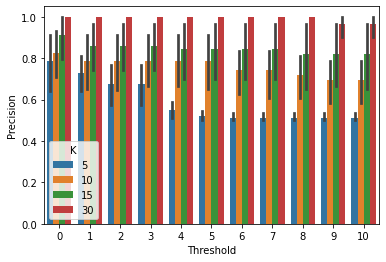

In [47]:
sns.barplot(x='Threshold', y='Precision', hue='K', data=nonPriv)

<AxesSubplot:xlabel='Threshold', ylabel='Accuracy'>

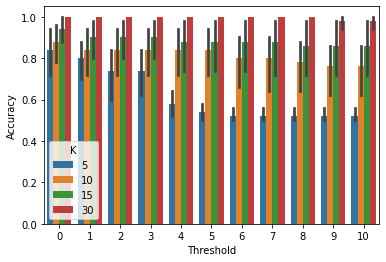

In [48]:
sns.barplot(x='Threshold', y='Accuracy', hue='K', data=nonPriv)

<AxesSubplot:xlabel='Threshold', ylabel='Recall'>

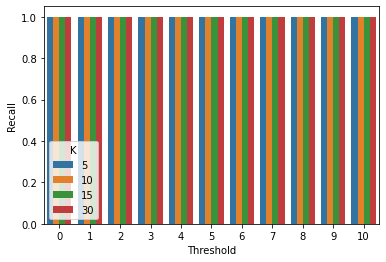

In [49]:
sns.barplot(x='Threshold', y='Recall', hue='K', data=nonPriv)

I think the recall is not very informative for the original data.
1. Both precision and accuracy decrease as we increase th, i.e. there are more false positive.
2. Larger K (i.e., larger background knowldge) increases the attack accuracy

In [38]:
Priv = pd.read_csv('Attack_SanData.csv')
Priv.head()

,Run,K,Threshold,Precision,Recall,Accuracy,Epsilon,BlockSize
0,0,5,0,0.0,0.0,0.5,1.0,1
1,0,5,1,0.0,0.0,0.5,1.0,1
2,0,5,2,0.0,0.0,0.5,1.0,1
3,0,5,3,0.0,0.0,0.5,1.0,1
4,0,5,4,0.0,0.0,0.5,1.0,1


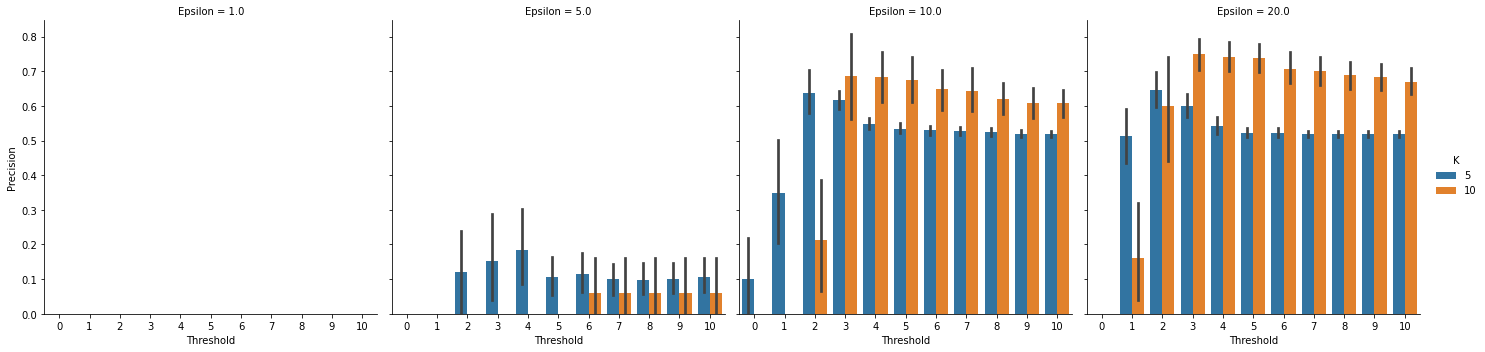

In [39]:
sns.catplot(x="Threshold", y="Precision", hue='K', col="Epsilon", data=Priv[Priv['BlockSize']==5],  kind="bar", ci=95)

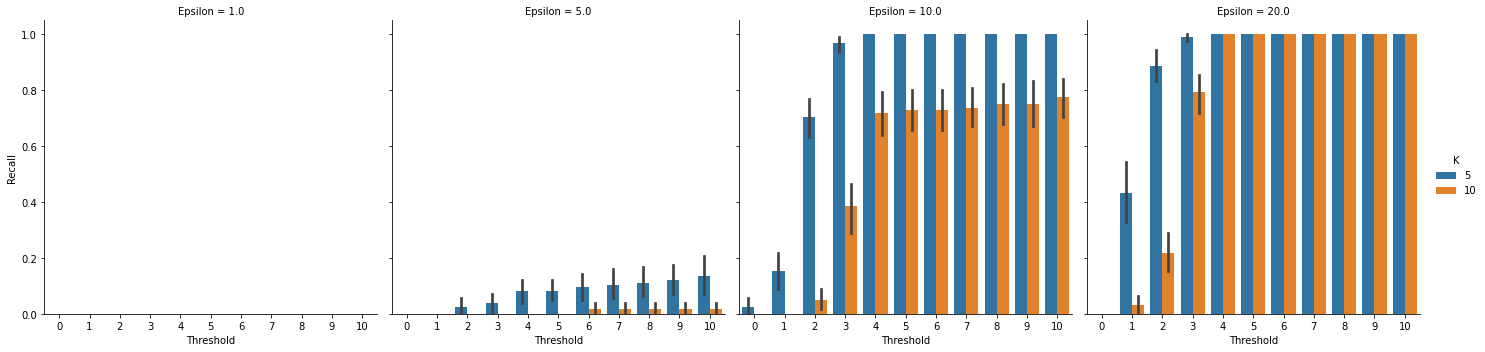

In [40]:
sns.catplot(x="Threshold", y="Recall", hue='K', col="Epsilon", data=Priv[Priv['BlockSize']==5],  kind="bar", ci=95)

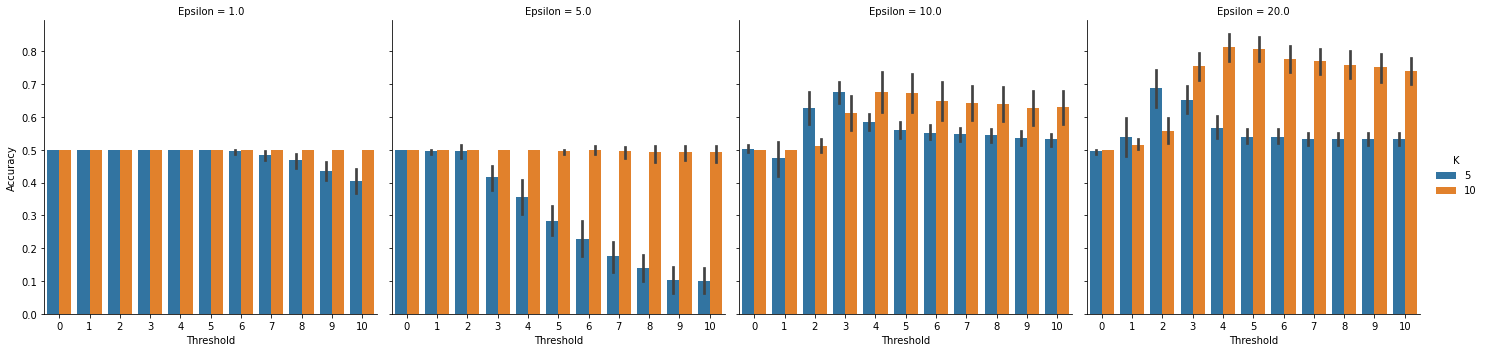

In [41]:
sns.catplot(x="Threshold", y="Accuracy", hue='K', col="Epsilon", data=Priv[Priv['BlockSize']==5],  kind="bar", ci=95)

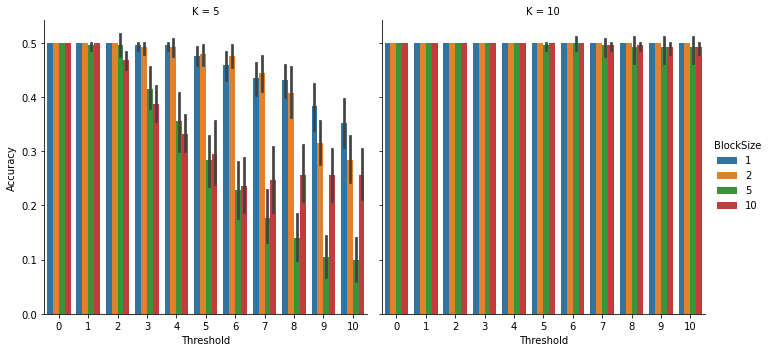

In [43]:
sns.catplot(x="Threshold", y="Accuracy", hue='BlockSize', col="K", data=Priv[Priv['Epsilon']==5.0],  kind="bar", ci=95)

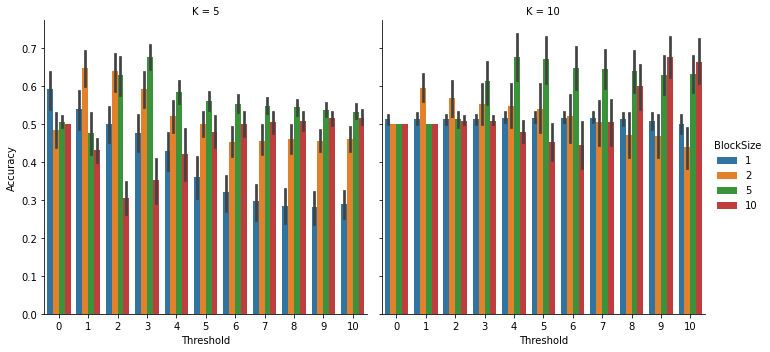

In [44]:
sns.catplot(x="Threshold", y="Accuracy", hue='BlockSize', col="K", data=Priv[Priv['Epsilon']==10.0],  kind="bar", ci=95)

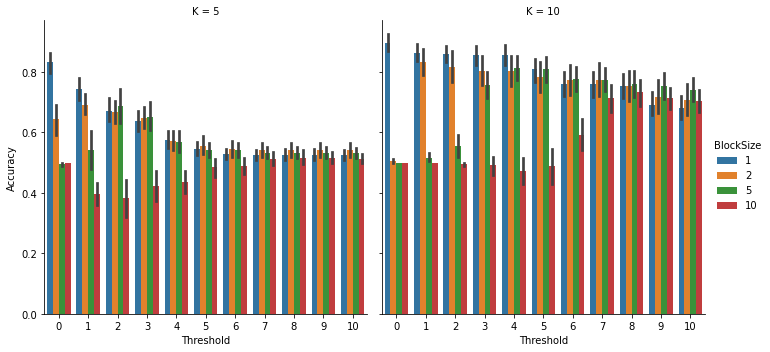

In [45]:
sns.catplot(x="Threshold", y="Accuracy", hue='BlockSize', col="K", data=Priv[Priv['Epsilon']==20.0],  kind="bar", ci=95)

Focus on the last 3 plots for the sanitization method. 
1. The attacker is more accurate as we relax privacy
2. Beause of randomized method performs randomized response using a fixed block size, the adversary could use the block size to approximately choose a good threshold value for the attack in high privacy regime.
3. Overall we can reduce the attacker's accuracy with our sanitization. For example using epsilon 5.0 or epsilon 10.0.